# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)
Описание данных

Признаки</p>
<p> RowNumber — индекс строки в данных</p>
<p>CustomerId — уникальный идентификатор клиента</p>
<p>Surname — фамилия</p>
<p>CreditScore — кредитный рейтинг</p>
<p>Geography — страна проживания</p>
<p>Gender — пол</p>
<p>Age — возраст</p>
<p>Tenure — сколько лет человек является клиентом банка</p>
<p>Balance — баланс на счёте</p>
<p>NumOfProducts — количество продуктов банка, используемых клиентом</p>
<p>HasCrCard — наличие кредитной карты</p>
<p>IsActiveMember — активность клиента</p>
<p>EstimatedSalary — предполагаемая зарплата</p>
<p>
<p>Целевой признак</p>
<p>Exited — факт ухода клиента</p>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
encoder = OrdinalEncoder()
df = pd.read_csv('C:/Users/VovAz/Desktop/Churn.csv')
df.duplicated().value_counts() # проверяем на наличие дубликатов
df.info()#проверяем данные. В столбце Tenure имеются пропущенные значения. 

tenure_pred = df[df['Tenure'].isna()]#выделяем строки в которых пропущены значения Tenure 
traning_tenure = df.dropna()#для обучения модели оставляем строки без пропущенных значений
traning_tenure = traning_tenure.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
#выделяем признаки;
traning_tenure = pd.DataFrame(encoder.fit_transform(traning_tenure),columns=traning_tenure.columns)
# проводим порядковое кодирование данных
features_tenure = traning_tenure.drop(['Tenure'], axis =1 )
target_tenure = traning_tenure['Tenure']#выделяем целевое значение
features_tenure_train, features_tenure_valid,target_tenure_train, target_tenure_valid = train_test_split(features_tenure,
                                                                                                          target_tenure,
                                                                                                         test_size = 0.25,
                                                                                                         random_state = 12345)
#делим данные на валидационную и тренировочную выборку
               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [2]:
%%time
best_model = None
best_result = 1000
for est in range(1,101,10):
    for depth in range(1,21):
        model = RandomForestRegressor(n_estimators = est, max_depth = depth, random_state = 12345)#проводим обучение модели рандмоного леса
        model.fit(features_tenure_train, target_tenure_train)
        pred = model.predict(features_tenure_valid)
        result = mean_absolute_error(target_tenure_valid, pred)
        if result < best_result:
            best_result = result
            best_model = model
print('Лучшая модель рандомного леса:',best_model,'\nРезультат MAE:', best_result)#печатаем результат мае у лучшей модели

Лучшая модель рандомного леса: RandomForestRegressor(max_depth=1, n_estimators=31, random_state=12345) 
Результат MAE: 2.4506580669071116
Wall time: 2min


In [3]:
model1 = LinearRegression()
model1.fit(features_tenure_train, target_tenure_train)
pred1 = model.predict(features_tenure_valid)
result1 = mean_absolute_error(target_tenure_valid, pred1)
print ('Результат МАЕ модели логистической регрессии:', result1)#.49

Результат МАЕ модели логистической регрессии: 2.48682887379274


In [4]:
dummy = DummyRegressor(strategy = 'median')# проверяем адекватность модели с помощью дамми-модели
dummy.fit(features_tenure_train, target_tenure_train)
pred2 = dummy.predict(features_tenure_valid)
result_dummy =  mean_absolute_error(target_tenure_valid, pred2)
print ('Результат МАЕ Дамми-модели:', result_dummy)#результат предсказания дамми-модели лучше, чем у нашей модели

Результат МАЕ Дамми-модели: 2.445666520017598


In [5]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())#заполняем пропущенные данные медианой

Прочитали, изучили данные, типы данных требуют корректировки для обучения моедли, дубликатов нет,  порядковый номер, айди или фамилия клиента вряд ли влияет на целевое значение, поэтому данные были удалены. Пробуем сделать модель, которая предсказывает срок пользования банком. Пропущенные данные в столбце Tenure были заменены медианой, поскольку не удалось создать адекватную модель для предсказания значений.

## Исследование задачи

In [6]:
%%time
data_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)#проводим кодирование данных методом порядкового кодирования
features = data_ordinal.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)#выделяем параметры
target = data_ordinal['Exited']#выделяем целевые показатели
print('Баланс классов в целевом признаке:\n',target.value_counts())
features, features_test, target, target_test = train_test_split (features,target, test_size = 0.20, random_state = 12345)
features_train, features_valid, target_train, target_valid = train_test_split(features,target, test_size = 0.25,
                                                                                                random_state = 12345)
best_model1 = None
best_result1 = 0    
for i in range (1,21):
    model = DecisionTreeClassifier(random_state=12345, max_depth = i)
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    result1 = f1_score(target_valid, predicted_valid)
    if result1 > best_result1:
        best_model1 = model
        best_result1 = result1
print('\nПараметры лучшей модели на основе дерева решений:', best_model1,'\nЗначение F1 у Дерева решений', best_result1)
predicted_valid = best_model1.predict(features_valid)
print('Матрица ошибок:\n',confusion_matrix(target_valid, predicted_valid))

Баланс классов в целевом признаке:
 0.0    7963
1.0    2037
Name: Exited, dtype: int64

Параметры лучшей модели на основе дерева решений: DecisionTreeClassifier(max_depth=12, random_state=12345) 
Значение F1 у Дерева решений 0.5257142857142857
Матрица ошибок:
 [[1484  125]
 [ 207  184]]
Wall time: 433 ms


In [7]:
%%time
best_model = None
best_result = 0
for est in range(1,101,10):
    for depth in range(1,21):
        model1 = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state = 12345)#проводим обучение модели рандмоного леса
        model1.fit(features_train, target_train)
        predicted_valid = model1.predict(features_valid)
        result1 = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_result = result1
            best_model = model1
print('Лучшая модель рандомного леса:', best_model,'\nЗначение F1:', best_result)
predicted_valid = best_model.predict(features_valid)
print('Матрица ошибок:\n',confusion_matrix(target_valid, predicted_valid))



Лучшая модель рандомного леса: RandomForestClassifier(max_depth=20, n_estimators=91, random_state=12345) 
Значение F1: 0.5436573311367381
Матрица ошибок:
 [[1558   51]
 [ 226  165]]
Wall time: 45.2 s


In [8]:
predicted_test = best_model.predict(features_test)
print('Значение F1 на тестовой выборке',f1_score(target_test, predicted_test))

Значение F1 на тестовой выборке 0.5752608047690015


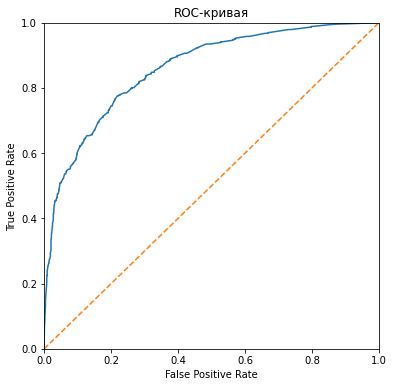

Значение AUC-ROC: 0.8587522760399067


In [9]:
probabilities_valid = best_model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print('Значение AUC-ROC:', auc_roc)

Изучили баланс класса, он составляет 20% положительных значений, соответственно модель может недообучаться на положительных значениях.  Это подверждает матрица отвественности, существует большое количество ложноположительных значений. Провели обучение моделей дерева решений и рандомного леса без учета дисбаланса класса. В случае модели дерево решений удалось добиться значения f1 в 0.52, у рандомного леса - 0.54. На тестовой выборке лучшая модель показала результат f1 - 0.58, построили кривую ошибок, значение AUC-ROC составило 0.858.

## Борьба с дисбалансом

In [10]:
%%time
def upsample(features, target, repeat):#создаем функцию для увеличения обучающих данных
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]# разделяем данные согласно целевому значению

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)# соединяем нулевые значения с положительными, умноженными на указанное число
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)# перемешиваем данные
    
    return features_upsampled, target_upsampled# возвращаем целевые значения и признаки после перемешивания и увеличения

    
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)
best_model = None
best_result = 0
for est in range(1,102,10):
    for depth in range(1,31):
        model1 = RandomForestClassifier(n_estimators = est, max_depth = depth, random_state = 12345, class_weight = 'balanced')#проводим обучение модели рандмоного леса на новых данных
        model1.fit(features_upsampled, target_upsampled)
        predicted_valid = model1.predict(features_valid)
        result1 = f1_score(target_valid, predicted_valid)
        if result1 > best_result:
            best_result = result1
            best_model = model1
print('Лучшая модель рандомного леса:', best_model,'\nЗначение F1:', best_result)

Лучшая модель рандомного леса: RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=91,
                       random_state=12345) 
Значение F1: 0.5912408759124088
Wall time: 3min 1s


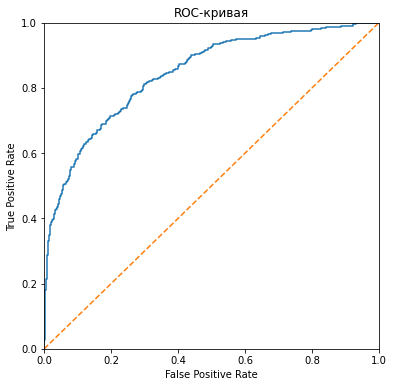

Значение AUC-ROC: 0.8444475528477124


In [11]:
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Значение AUC-ROC:', auc_roc)

С помощью тренировки модели на искуственно увеличенной выборке положительных значений удалось увеличить значение f1 до 0.59 на валидационной выборке. Построили кривую ошибок, значение AUC-ROC составило 0.84

## Тестирование модели

In [12]:
predicted_test = best_model.predict(features_test)
print('Значение F1 на тестовой выборке',f1_score(target_test, predicted_test))
def prediction_threshold(model,features, threshold): #строим функцию для изменения предсказания в зависимости от порога предсказаний
    proba = model.predict_proba(features)# принимает три параметра: модель, параметря для предсказания, порог предсказания положительного значения
    result = []
    for i in range (len(proba)):
    
        if proba[i,1] >= threshold:
            result.append(1.0)
        else:
            result.append(0.0)
    return result
for threshold in np.arange(0, 1, 0.01):# проводим анализ значения f1 для разного порога предсказания на лучшей модели и тестовой выборке
    new_predictions = prediction_threshold(best_model, features_test, threshold)

    print("Порог = {:.2f} | f1 = {:.3f}".format(threshold, f1_score(target_test, new_predictions)))
new_predictions = prediction_threshold(best_model, features_test, 0.49)
print ('Значение f1 после изменения порога', f1_score(target_test, new_predictions))


Значение F1 на тестовой выборке 0.6206896551724138
Порог = 0.00 | f1 = 0.352
Порог = 0.01 | f1 = 0.354
Порог = 0.02 | f1 = 0.360
Порог = 0.03 | f1 = 0.369
Порог = 0.04 | f1 = 0.378
Порог = 0.05 | f1 = 0.385
Порог = 0.06 | f1 = 0.394
Порог = 0.07 | f1 = 0.401
Порог = 0.08 | f1 = 0.407
Порог = 0.09 | f1 = 0.415
Порог = 0.10 | f1 = 0.424
Порог = 0.11 | f1 = 0.433
Порог = 0.12 | f1 = 0.441
Порог = 0.13 | f1 = 0.450
Порог = 0.14 | f1 = 0.459
Порог = 0.15 | f1 = 0.464
Порог = 0.16 | f1 = 0.474
Порог = 0.17 | f1 = 0.481
Порог = 0.18 | f1 = 0.484
Порог = 0.19 | f1 = 0.491
Порог = 0.20 | f1 = 0.500
Порог = 0.21 | f1 = 0.507
Порог = 0.22 | f1 = 0.513
Порог = 0.23 | f1 = 0.521
Порог = 0.24 | f1 = 0.529
Порог = 0.25 | f1 = 0.540
Порог = 0.26 | f1 = 0.548
Порог = 0.27 | f1 = 0.554
Порог = 0.28 | f1 = 0.553
Порог = 0.29 | f1 = 0.560
Порог = 0.30 | f1 = 0.565
Порог = 0.31 | f1 = 0.576
Порог = 0.32 | f1 = 0.585
Порог = 0.33 | f1 = 0.585
Порог = 0.34 | f1 = 0.588
Порог = 0.35 | f1 = 0.582
Порог = 0.36 

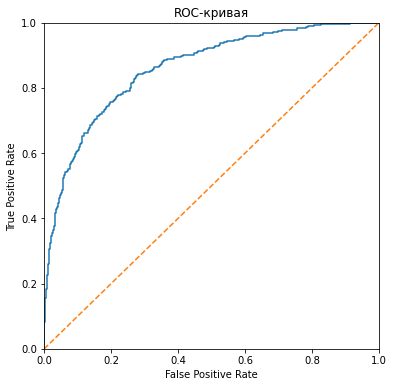

In [13]:
probabilities_valid = best_model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [14]:
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print('Значение AUC-ROC:', auc_roc)

Значение AUC-ROC: 0.8597691429286064


In [15]:
for i in ['stratified', 'uniform']:#посмотрим результаты f1 меры для dummy модели
    cls = DummyClassifier(strategy = i).fit(features_train, target_train)
    predicted_valid_test = cls.predict(features_test)
    result = f1_score(target_test, predicted_valid_test)
    print('Значение f1 для DummyClassifier с параметром:', i, result)


Значение f1 для DummyClassifier с параметром: stratified 0.1820418204182042
Значение f1 для DummyClassifier с параметром: uniform 0.300355871886121


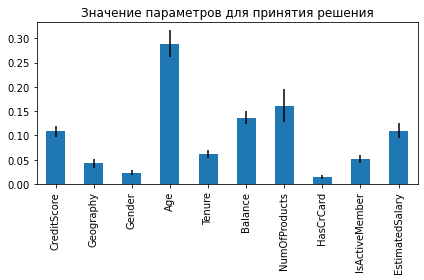

In [16]:
feature_names = [f"{i}" for i in features.columns]
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Значение параметров для принятия решения")
fig.tight_layout()

Модель была протестирована на тестовой выборке и показала значение f1 0.62, изменение порогового значения для принятия решения о выборе положительного класса на 0.49 позволило увеличить значение до 0.63. Была построена кривая ошибок, и посчитано значение AUC-ROC, которое оказалось равным 0.859. Модель показывает неплохие результаты в предсказании. Создали график учета параметров моделью при предсказании. Наиболее значимые параметры: возраст, количество продуктов, баланс на счету, заработная плата и кредитный рейтинг.